# Ageinc

## 1. Đọc dữ liệu

In [30]:
library('ggplot2')
library('gridExtra')
library('ggExtra')
library('clue')
library('factoextra')

In [5]:
df = read.csv('data/ageinc_g.csv', row.names=1)
df = df[, c(1,2)]
head(df)

,income,age
,<int>,<int>
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53
5,38361,26


## 2. Xem thông tin data

In [6]:
print(paste('Number of rows:', dim(df)[1]))
print(paste('Number of columns:', dim(df)[2]))

[1] "Number of rows: 1000"
[1] "Number of columns: 2"


In [7]:
summary(df)

     income            age       
 Min.   :     0   Min.   :18.00  
 1st Qu.: 46402   1st Qu.:30.00  
 Median : 78994   Median :39.00  
 Mean   : 80117   Mean   :39.41  
 3rd Qu.:114810   3rd Qu.:49.00  
 Max.   :179294   Max.   :63.00  

In [8]:
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ income: int  101743 49597 36517 33223 72994 38361 48579 115248 11527 54096 ...
 $ age   : int  58 27 52 49 53 26 29 24 31 51 ...


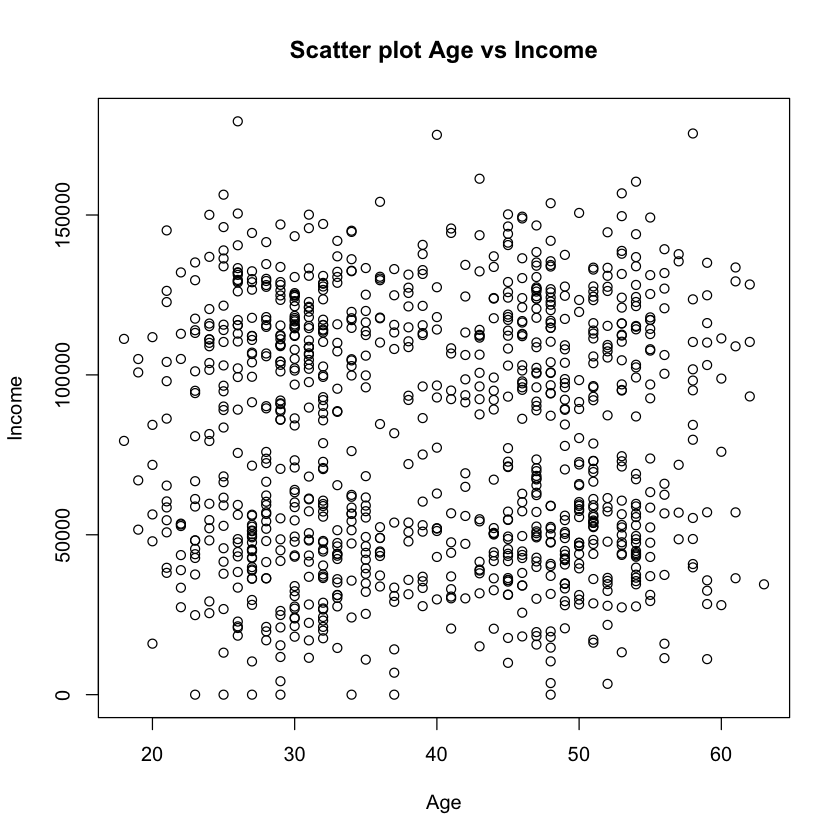

In [41]:
plot(x=df$age, y=df$income,
     xlab='Age', ylab='Income', main='Scatter plot Age vs Income')

Vì dữ liệu có 2 chiều scale khác nhau khá lớn, nên sẽ scale cho tiền xử lý dữ liệu

## 3. Tiền xử lý dữ liệu

Vì trong bài này không thực hiện regression hay classification nên scale tất cả các biến

In [10]:
df_scaled = data.frame(income = (df$income-mean(df$income))/sd(df$income), 
                       age = (df$age-mean(df$age))/sd(df$age))
head(df_scaled, 3)

,income,age
,<dbl>,<dbl>
1,0.5508124,1.693570
2,-0.7773307,-1.130565
3,-1.1104744,1.146963


## 4. Vẽ hình để xam xét mối quan hệ giưã các thuộc tính. Cho nhận xét dựa trên biểu đồ

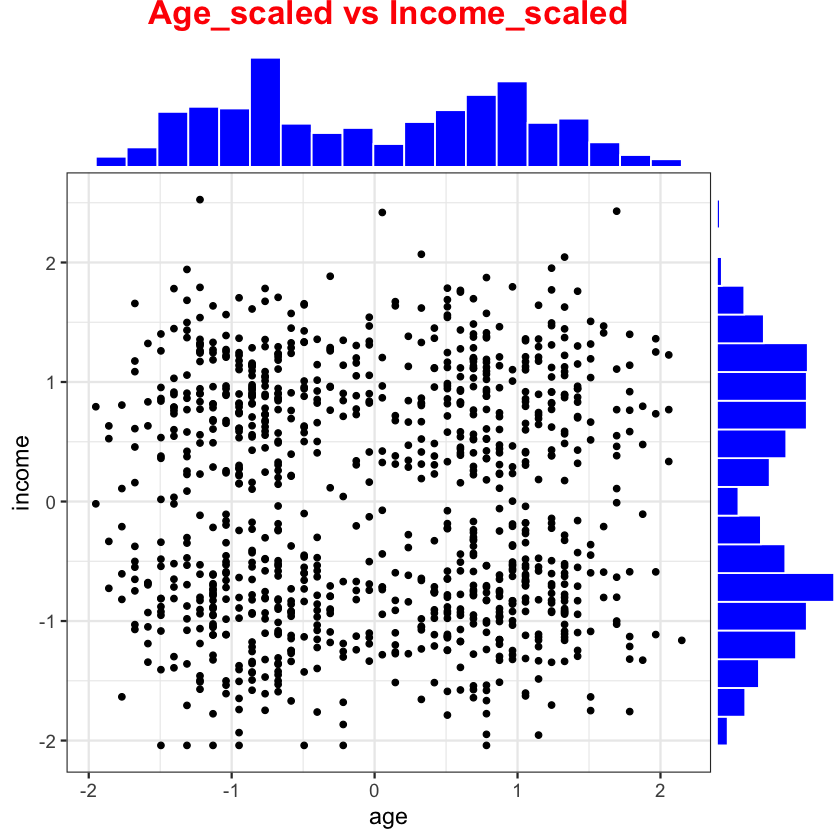

In [24]:
plot = ggplot(data = df_scaled, aes(x = age, y = income)) + 
        geom_point() + theme_bw(base_size=14) +
        ggtitle("Age_scaled vs Income_scaled") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))

ggMarginal(plot, type = 'histogram', col = 'white', fill = 'blue', bins = 20)

Nhận xét:
- Trực quan cho thấy có thể phân thành 4 nhóm
    - Nhóm Income thấp, Age thấp
    - Nhóm Income thấp, Age cao
    - Nhóm Income cao, Age thấp
    - Nhóm Income cao, Age cao
- Histogram cũng cho thấy mỗi feature có sự phân phối (distribution) phân ra làm 2 nhóm, với 2 mean khác nhau

## 5. Xây dựng model clustering

Tìm k tối ưu

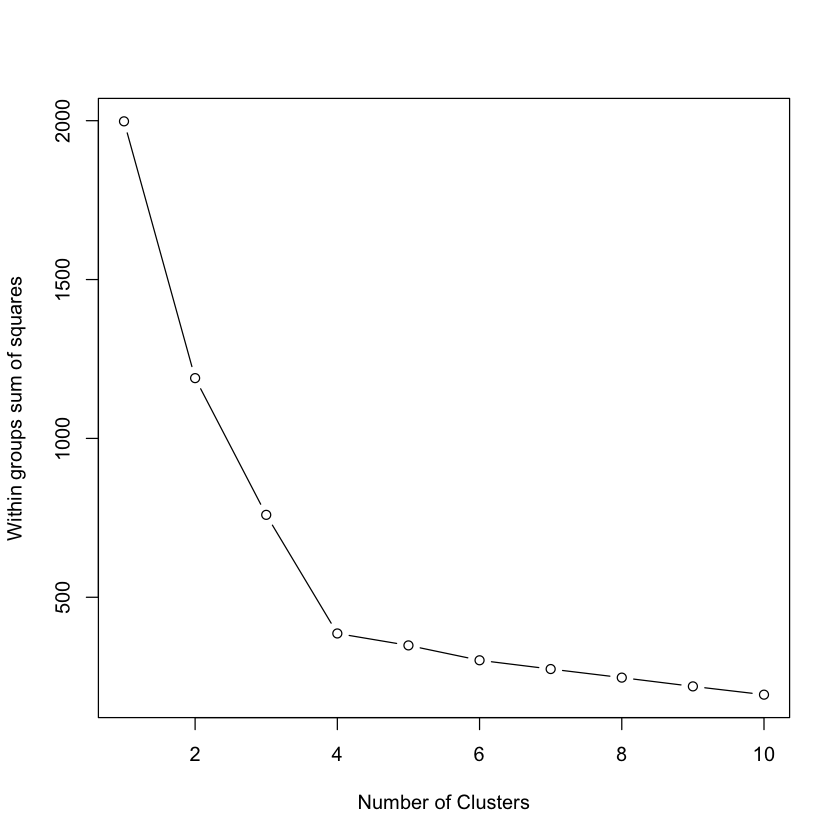

In [25]:
wss = (nrow(df_scaled) - 1)*sum(apply(df_scaled, 2, var))

for (i in 1:10) {
    wss[i] = sum(kmeans(df_scaled, centers = i)$withinss)
}

plot(1:10, wss, type = 'b',
     xlab = 'Number of Clusters',
     ylab = "Within groups sum of squares")

Nhận xét:
- Dựa trên nguyên tắc elbow method thì k=4 là tối ưu nhất
- Xây dựng model K-Means dựa trên k=4

In [26]:
set.seed(42)
cluster_model = kmeans(df_scaled, centers = 4)
cluster_model

K-means clustering with 4 clusters of sizes 248, 238, 256, 258

Cluster means:
      income        age
1 -0.9275455 -0.8914246
2  0.9190239  0.9100238
3 -0.8566593  0.9046200
4  0.8938310 -0.8802135

Clustering vector:
   [1] 2 1 3 3 3 1 1 4 1 3 1 1 1 2 2 3 4 4 1 3 1 4 2 2 1 4 2 1 2 4 1 1 1 4 4 4 1
  [38] 1 3 2 3 3 2 4 4 4 2 2 4 1 4 3 2 1 3 1 1 1 4 1 2 3 4 4 1 4 3 4 2 4 3 4 4 2
  [75] 3 3 1 4 4 2 2 1 4 3 4 3 3 3 3 4 3 1 3 4 1 1 4 3 3 3 1 4 3 2 3 1 4 3 3 3 1
 [112] 2 2 1 4 3 2 4 1 3 2 1 4 1 3 1 4 1 1 2 4 1 3 4 2 3 4 1 2 1 3 1 3 4 1 3 2 4
 [149] 4 1 4 1 4 3 1 1 4 1 4 2 2 4 2 4 2 1 1 2 4 1 4 3 4 2 3 3 2 2 4 4 3 1 4 1 2
 [186] 4 4 2 2 4 4 3 1 1 1 1 2 4 2 3 2 3 3 1 3 2 2 3 3 3 3 3 2 2 3 1 4 1 2 3 4 4
 [223] 1 4 4 2 3 1 3 2 2 3 2 4 1 4 1 2 1 2 2 3 1 4 3 2 2 1 1 4 1 1 1 3 3 3 4 4 2
 [260] 4 4 1 2 4 1 2 2 1 4 3 3 4 1 2 2 2 1 1 2 2 2 4 1 2 4 2 3 1 3 1 1 3 2 4 1 4
 [297] 3 4 2 1 4 3 4 2 1 3 3 4 1 3 4 4 3 3 3 1 4 1 2 3 3 1 2 3 3 1 2 3 3 3 3 1 4
 [334] 4 3 1 1 1 2 2 1 4 4 3 3 1 2 1 3 1 2 1 2 2 4 4

Nhận xét:
- Cluster model cho ra WSS khá đồng đều giữa các nhóm, điều này là khá tốt
- Số lượng các mẫu trong mỗi cụm khá đều nhau

## 6. Tìm kết quả => Có bao nhiêu cụm => Mẫu nào thuộc cụm nào

Kết quả từ model cho thấy số cụm k = 4 là hợp lý

In ra kết qủa các cụm cho các mẫu

In [28]:
df$cluster = cluster_model$cluster
head(df, 5)

,income,age,cluster
,<int>,<int>,<int>
0,101743,58,2
1,49597,27,1
2,36517,52,3
3,33223,49,3
4,72994,53,3


## 7. Trực quan hoá kết quả

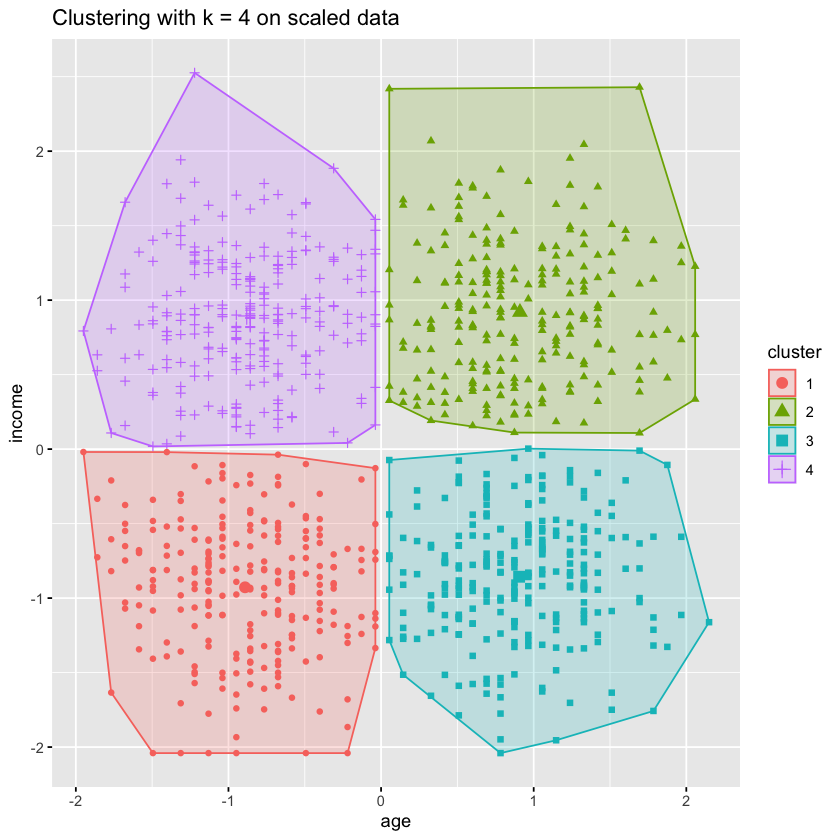

In [43]:
fviz_cluster(cluster_model, geom = "point", data = df_scaled[,c(2,1)]) + ggtitle("Clustering with k = 4 on scaled data")

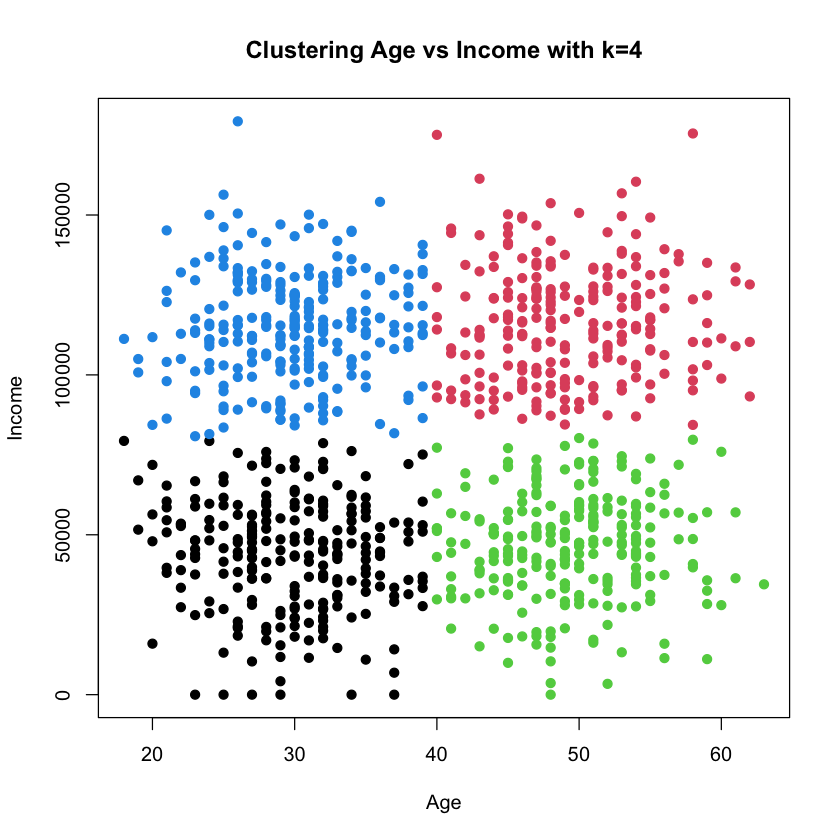

In [42]:
factor_label = as.factor(cluster_model$cluster)
plot(x = df$age, y = df$income, col = factor_label, pch=19,
     xlab='Age', ylab='Income', main='Clustering Age vs Income with k=4')

Nhận xét:
- Với số cụm tối ưu nhất (k=4) dựa trên WSS, dữ liệu được phân nhóm giống như nhận định khi trực quan hoá ban đầu
- Với việc phân nhóm này, bộ phận HR của công ty có thể phần nào sử dụng trong việc quản lý nhân sự theo nhóm
- Dữ liệu cũng chỉ ra một vài điều thú vụ như: 
    - Income không có mối tương quan nhiều theo độ tuổi -> Người nào giỏi có đóng góp cao ở công ty sẽ được lương cao, người làm lâu ở cty chưa chắc lương đã cao
    - Có thể đưa ra chiến lược như phát triển nhóm độ tuổi thấp - lương cao (tài năng), giữ chân nhóm độ tuổi cao - lương cao (giá trị: quản lý, CEO...), giảm bớt nhóm lâu năm ít phát triển tuổi cao - lương thấp, thay bằng nhóm tuổi thấp - lương thấp để phát triển trong tương lai